### Salary prediction of new employee--

Importing of packages--

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math as m
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

Read the data file--

In [2]:
def read_data():
    path="C:/top mentor data sci assignmets/21 may/polynomial assigment"
    filename="/Position_Salaries.csv"
    data=pd.read_csv(path+filename)
    return data

print("Calling read_data function--")
data=read_data()
print(data)

Calling read_data function--
            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [3]:
data.shape

(10, 3)

print basic info about data --

In [4]:
print(data.columns)
print("===========================================")
print(data.dtypes)
print("===========================================")
print(data.info())
print("===========================================")
print("Average salary offer in company--",data["Salary"].mean())
print("Highest salary offer in company--",data["Salary"].max())
print("Minimum salary offer in company--",data["Salary"].min())

Index(['Position', 'Level', 'Salary'], dtype='object')
Position    object
Level        int64
Salary       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None
Average salary offer in company-- 249500.0
Highest salary offer in company-- 1000000
Minimum salary offer in company-- 45000


In [5]:
data.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

Checking for missing values --

Position    0
Level       0
Salary      0
dtype: int64


<AxesSubplot:>

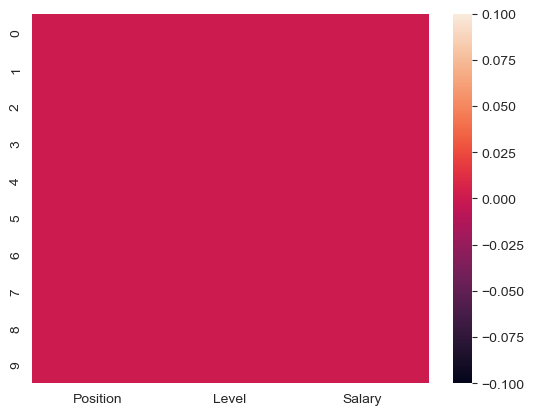

In [6]:
print(data.isnull().sum())
sns.heatmap(data.isnull())

There are no missing values.

Exploratory Data Analysis --

2.1046045743695876


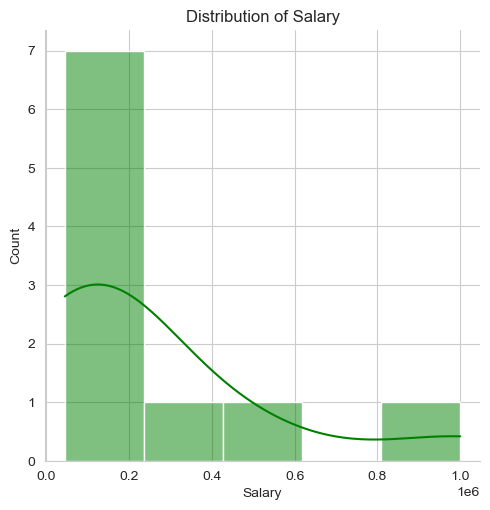

In [7]:
sns.displot(x=data["Salary"],color="g",kde=True)
plt.title("Distribution of Salary")
print(data["Salary"].skew())

Salary is positively skewed.

<AxesSubplot:title={'center':'Relation between Position and Level'}, xlabel='Position', ylabel='Level'>

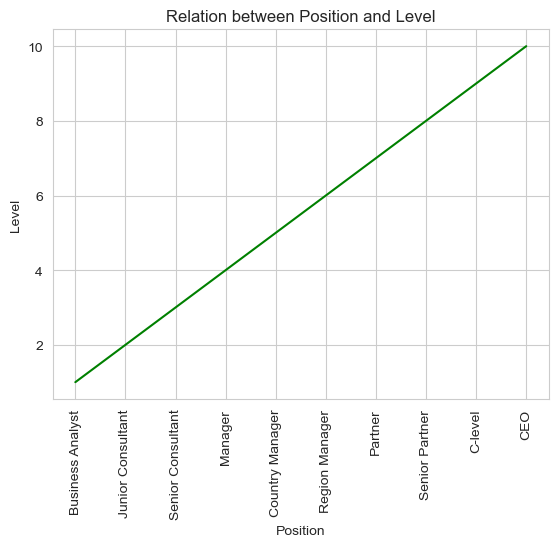

In [8]:
plt.xticks(rotation=90,fontsize="medium")
plt.title("Relation between Position and Level")
sns.lineplot(x="Position",y="Level",data=data,color="g")

The above lineplot represents relation between level and different positions offered in a company.

<AxesSubplot:xlabel='Level', ylabel='Salary'>

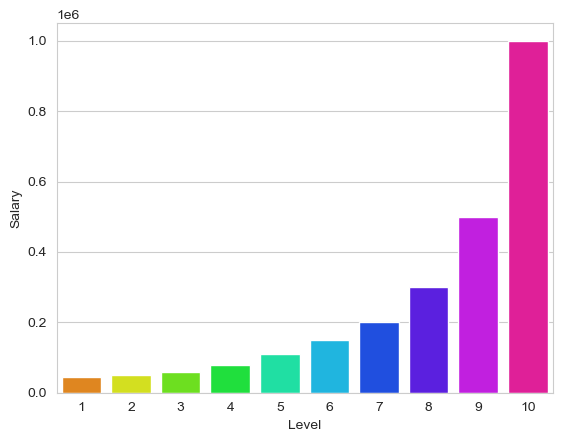

In [9]:
sns.barplot(x="Level",y="Salary",data=data,palette="hsv")

From above barplot we can remark that as level rises there is hike in salary.

In [10]:
data.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


<AxesSubplot:>

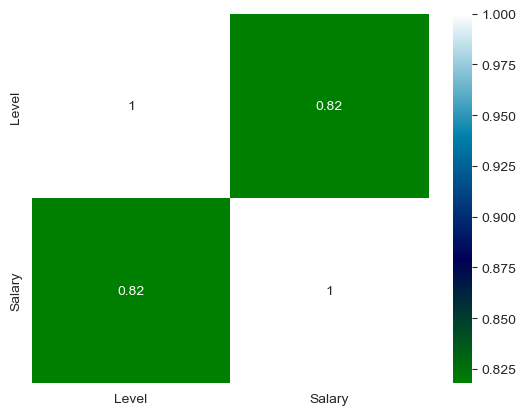

In [11]:
sns.heatmap(data.corr(),annot=True,cmap="ocean")

Level and Salary of employee is highly co-related.

Lets build a model to predict salary of Regional Manager who falls under level 6.5--<br>
Building a model--

Calling the model_fit function--
Model training is completed
Calling the model_pred function--
Pred_salary [[-114454.54545455]
 [ -33575.75757576]
 [  47303.03030303]
 [ 128181.81818182]
 [ 209060.60606061]
 [ 289939.39393939]
 [ 370818.18181818]
 [ 451696.96969697]
 [ 532575.75757576]
 [ 613454.54545455]]
r2_score: 66.9
RMSE: 163388.73519272613
Lets visualize the plot for Linear Regression--


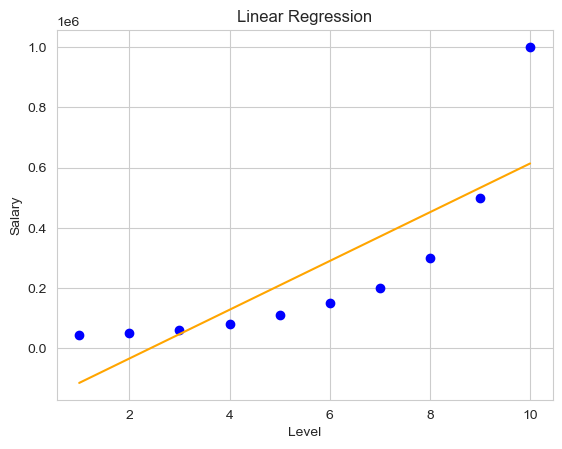

Lets predict the salary based on linear regression model--
Predicted salary of a Regional Manager at 6.5 level is $ [[330378.78787879]]


In [12]:
X=data.iloc[:,1:2].values.reshape(-1,1)
y=data.iloc[:,2].values.reshape(-1,1)

def model_fit(X,y):
    modelL=LinearRegression()
    model_trainL=modelL.fit(X,y)
    print("Model training is completed")
    return model_trainL
print("Calling the model_fit function--")
model_trainL=model_fit(X,y)

def model_pred():
    predL=model_trainL.predict(X)
    return predL
print("Calling the model_pred function--")
predL=model_pred()

print("Pred_salary",predL)
print("r2_score:",round(r2_score(y,predL)*100,2))
rmse = m.sqrt(mean_squared_error(y,predL))
print('RMSE:',rmse)

print('Lets visualize the plot for Linear Regression--')
plt.scatter(X,y,color="blue")
plt.plot(X,predL,color="orange")
plt.title("Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

print('Lets predict the salary based on linear regression model--')
print("Predicted salary of a Regional Manager at 6.5 level is $",model_trainL.predict([[6.5]]))

Lets build a Polynomial regression model--
Creating polynomial feature matrix--
[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]
Calling the model_fitp function--
Model training is completed
Calling the model_predp function--
Pred_salary using polynomial regression [[ 14902.09790211]
 [ 78759.90675991]
 [ 94960.37296037]
 [ 88223.77622377]
 [ 83270.3962704 ]
 [104820.51282051]
 [177594.40559441]
 [326312.35431236]
 [575694.63869464]
 [950461.53846153]]
r2_score: 98.12
RMSE: 38931.504012329184
Lets visualize the plot for Polynomial Regression--(Degree=3)


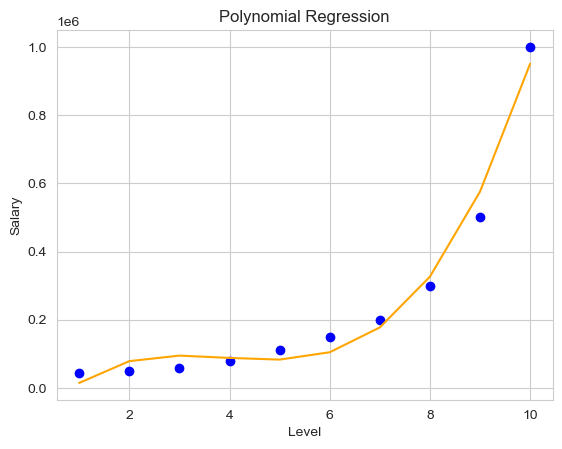

None
Lets predict the salary based on Polynomial Regression model--
Predicted salary of a Regional Manager at 6.5 level is $ [[133259.46969697]]


In [13]:
print('Lets build a Polynomial regression model--')

from sklearn.preprocessing import PolynomialFeatures
print("Creating polynomial feature matrix--")
poly=PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X)
print(X_poly)

def model_fitp(X_poly,y):
    modelp=LinearRegression()
    model_trainp=modelp.fit(X_poly,y)
    print("Model training is completed")
    return model_trainp
print("Calling the model_fitp function--")
model_trainp=model_fitp(X_poly,y)

def model_predp():
    predp=model_trainp.predict(X_poly)
    return predp
print("Calling the model_predp function--")
predp=model_predp()

print("Pred_salary using polynomial regression",predp)
print("r2_score:",round(r2_score(y,predp)*100,2))
rmse = m.sqrt(mean_squared_error(y,predp))
print('RMSE:',rmse)

print('Lets visualize the plot for Polynomial Regression--(Degree=3)')
plt.scatter(X,y,color="blue")
plt.plot(X,predp,color="orange")
plt.title("Polynomial Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
print(plt.show())

print('Lets predict the salary based on Polynomial Regression model--')
print("Predicted salary of a Regional Manager at 6.5 level is $",model_trainp.predict(poly.fit_transform([[6.5]])))

Lets build a Polynomial regression model--
Creating polynomial feature matrix--
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]
Calling the model_fitp function--
Model training is completed
Calling the model_predp function--
Pred_salary using polynomial regression [[ 53356.64335681]
 [ 31759.90675996]
 [ 58642.19114221]
 [ 94632.86713289]
 [121724.94172498]
 [143275.05827508]
 [184003.49650349]
 [289994.17249411]
 [528694.63869452]
 [988916.08391594]]
r2_score: 99.74
RMSE: 14503.234909626832
Lets visualize the p

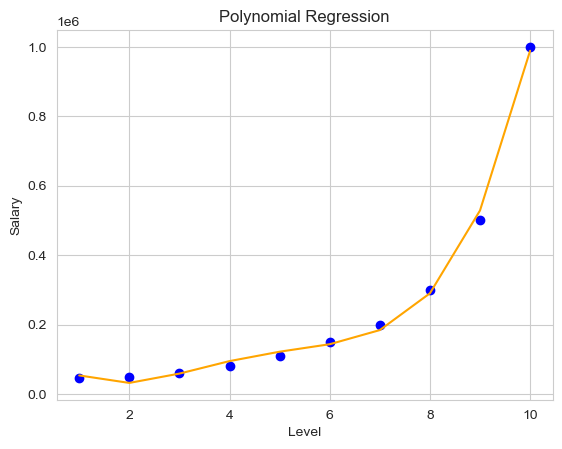

None
Lets predict the salary based on Polynomial Regression model--
Predicted salary of a Regional Manager at 6.5 level is $ [[158862.45265153]]


In [14]:
print('Lets build a Polynomial regression model--')

from sklearn.preprocessing import PolynomialFeatures
print("Creating polynomial feature matrix--")
poly=PolynomialFeatures(degree=4)
X_poly=poly.fit_transform(X)
print(X_poly)

def model_fitp(X_poly,y):
    modelp=LinearRegression()
    model_trainp=modelp.fit(X_poly,y)
    print("Model training is completed")
    return model_trainp
print("Calling the model_fitp function--")
model_trainp=model_fitp(X_poly,y)

def model_predp():
    predp=model_trainp.predict(X_poly)
    return predp
print("Calling the model_predp function--")
predp=model_predp()

print("Pred_salary using polynomial regression",predp)
print("r2_score:",round(r2_score(y,predp)*100,2))
rmse = m.sqrt(mean_squared_error(y,predp))
print('RMSE:',rmse)

print('Lets visualize the plot for Polynomial Regression--(Degree=4)')
plt.scatter(X,y,color="blue")
plt.plot(X,predp,color="orange")
plt.title("Polynomial Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
print(plt.show())

print('Lets predict the salary based on Polynomial Regression model--')
print("Predicted salary of a Regional Manager at 6.5 level is $",model_trainp.predict(poly.fit_transform([[6.5]])))

With degree=3 Predicted salary of a Regional Manager at 6.5 level comes around $133259.46 <br>

besides, with degree=4 it comes around $158862.45 which seems in accordance with our data.